In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/train_FD001.csv')

# Display the first 5 rows
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


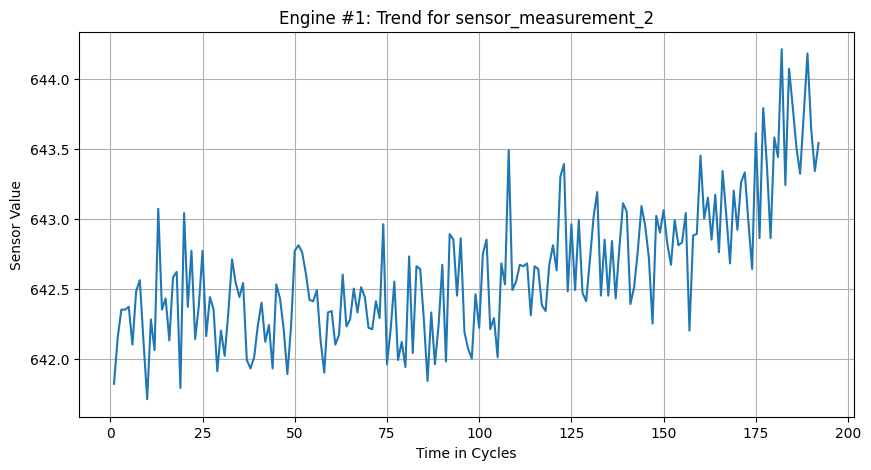

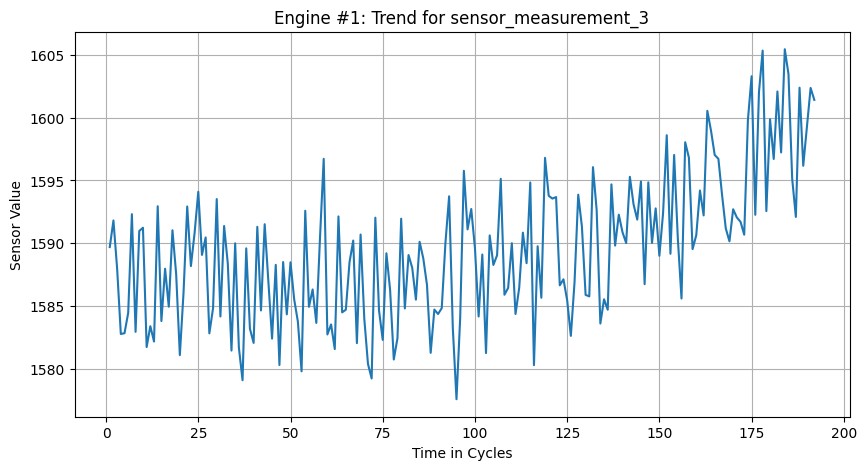

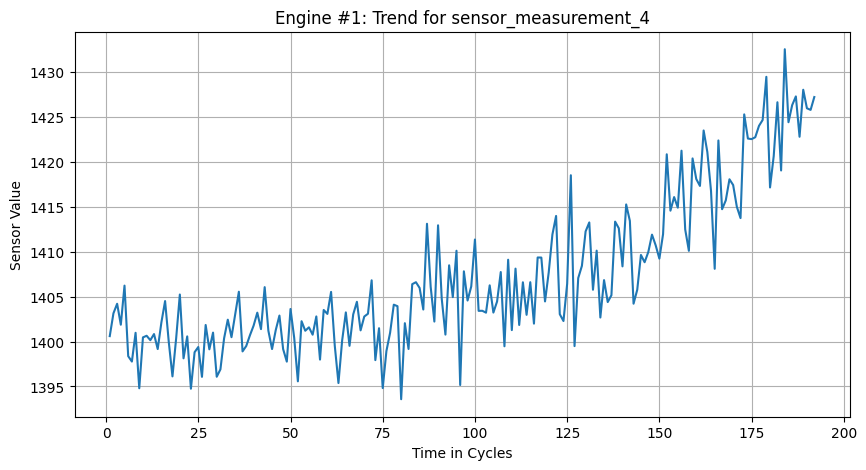

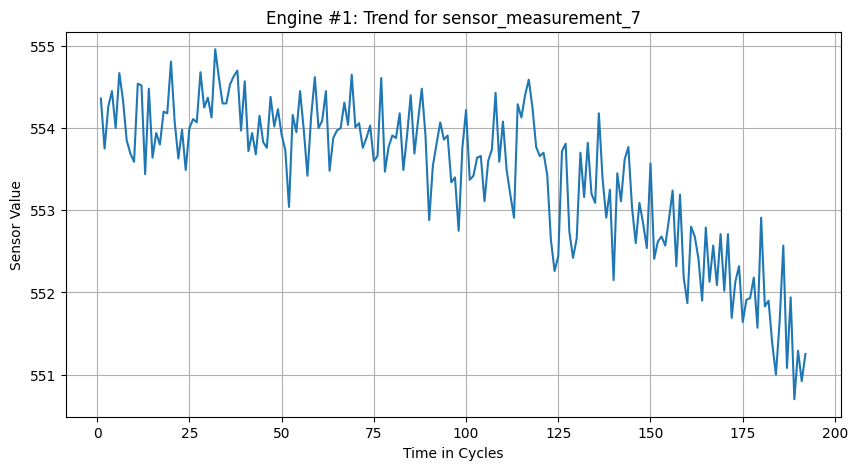

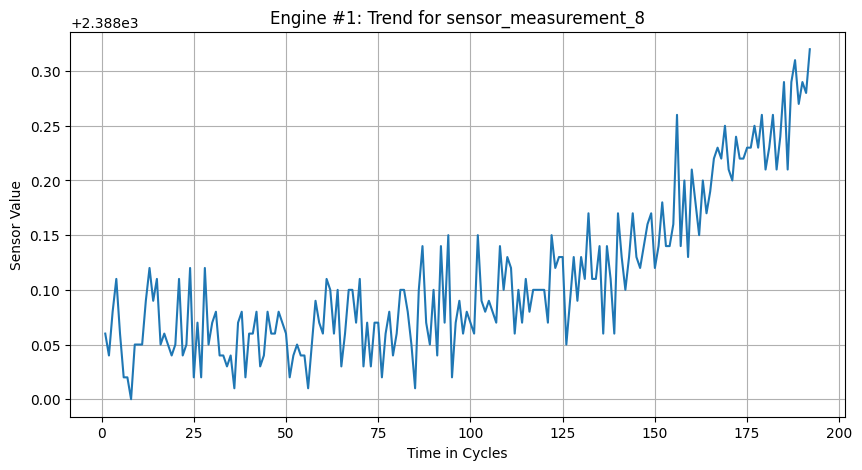

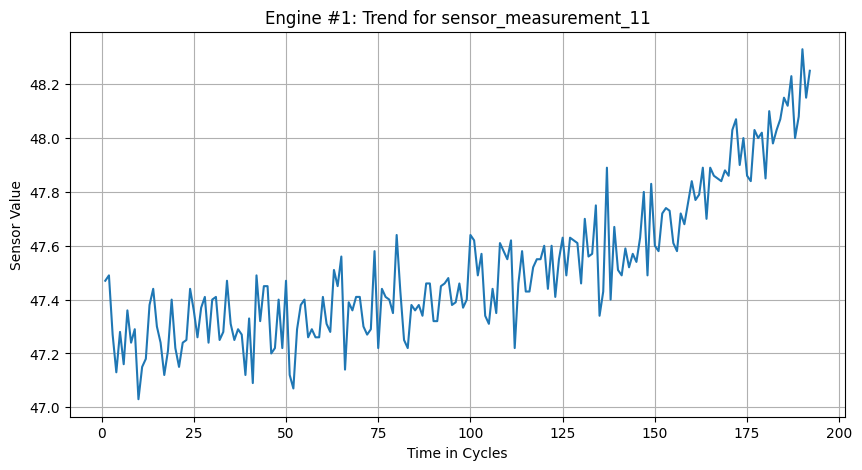

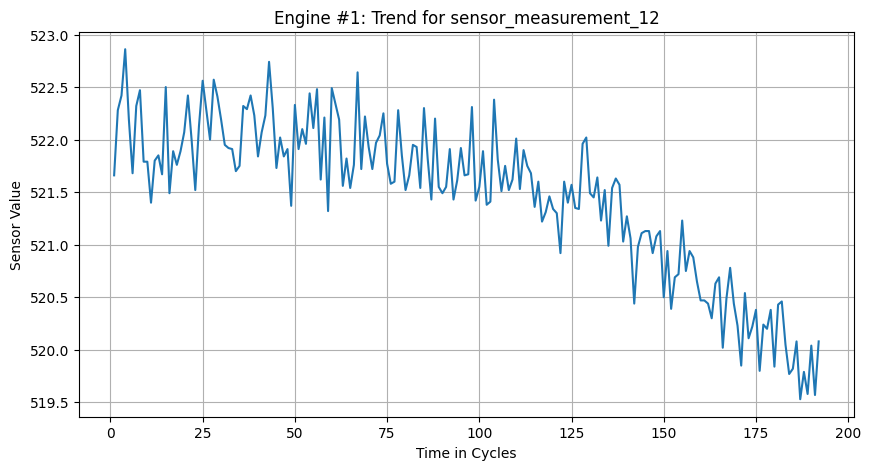

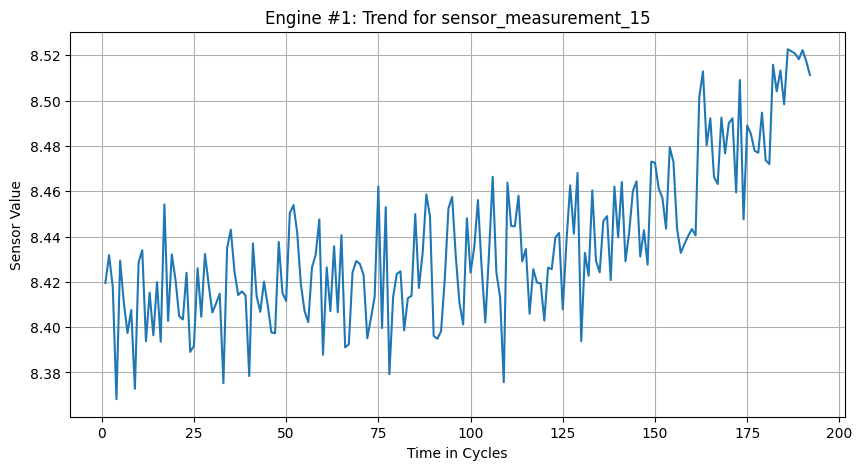

In [15]:
# Select a subset of sensor columns to plot individually
sensors_to_plot = [
    'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
    'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_11',
    'sensor_measurement_12', 'sensor_measurement_15'
]

# Create a separate plot for each sensor
for sensor in sensors_to_plot:
    plt.figure(figsize=(10, 5))
    plt.plot(engine_1_df['time_in_cycles'], engine_1_df[sensor])
    plt.grid(True)
    plt.title(f'Engine #1: Trend for {sensor}')
    plt.xlabel('Time in Cycles')
    plt.ylabel('Sensor Value')
    plt.show()

In [16]:
# --- Create the RUL (Remaining Useful Life) Column ---
# This is essential for our analysis
max_cycles = df.groupby('unit_number')['time_in_cycles'].max()
df = df.merge(max_cycles.to_frame(name='max_cycles'), left_on='unit_number', right_index=True)
df['RUL'] = df['max_cycles'] - df['time_in_cycles']
df.drop(columns=['max_cycles'], inplace=True)

print("Data is ready for detailed EDA.")
df.head()

Data is ready for detailed EDA.


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [17]:
#UNIVARIATE ANALYSIS
from sklearn.model_selection import train_test_split

# Define the feature columns
feature_cols = [
    'op_setting_1', 'op_setting_2', 'op_setting_3'
]
feature_cols += [f'sensor_measurement_{i}' for i in range(1, 22)]

# Define X and y
X = df[feature_cols]
y = df['label']

# Split the data
# We use stratify=y to ensure the train and test sets have a similar proportion of each class
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shapes of the new dataframes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

KeyError: 'label'

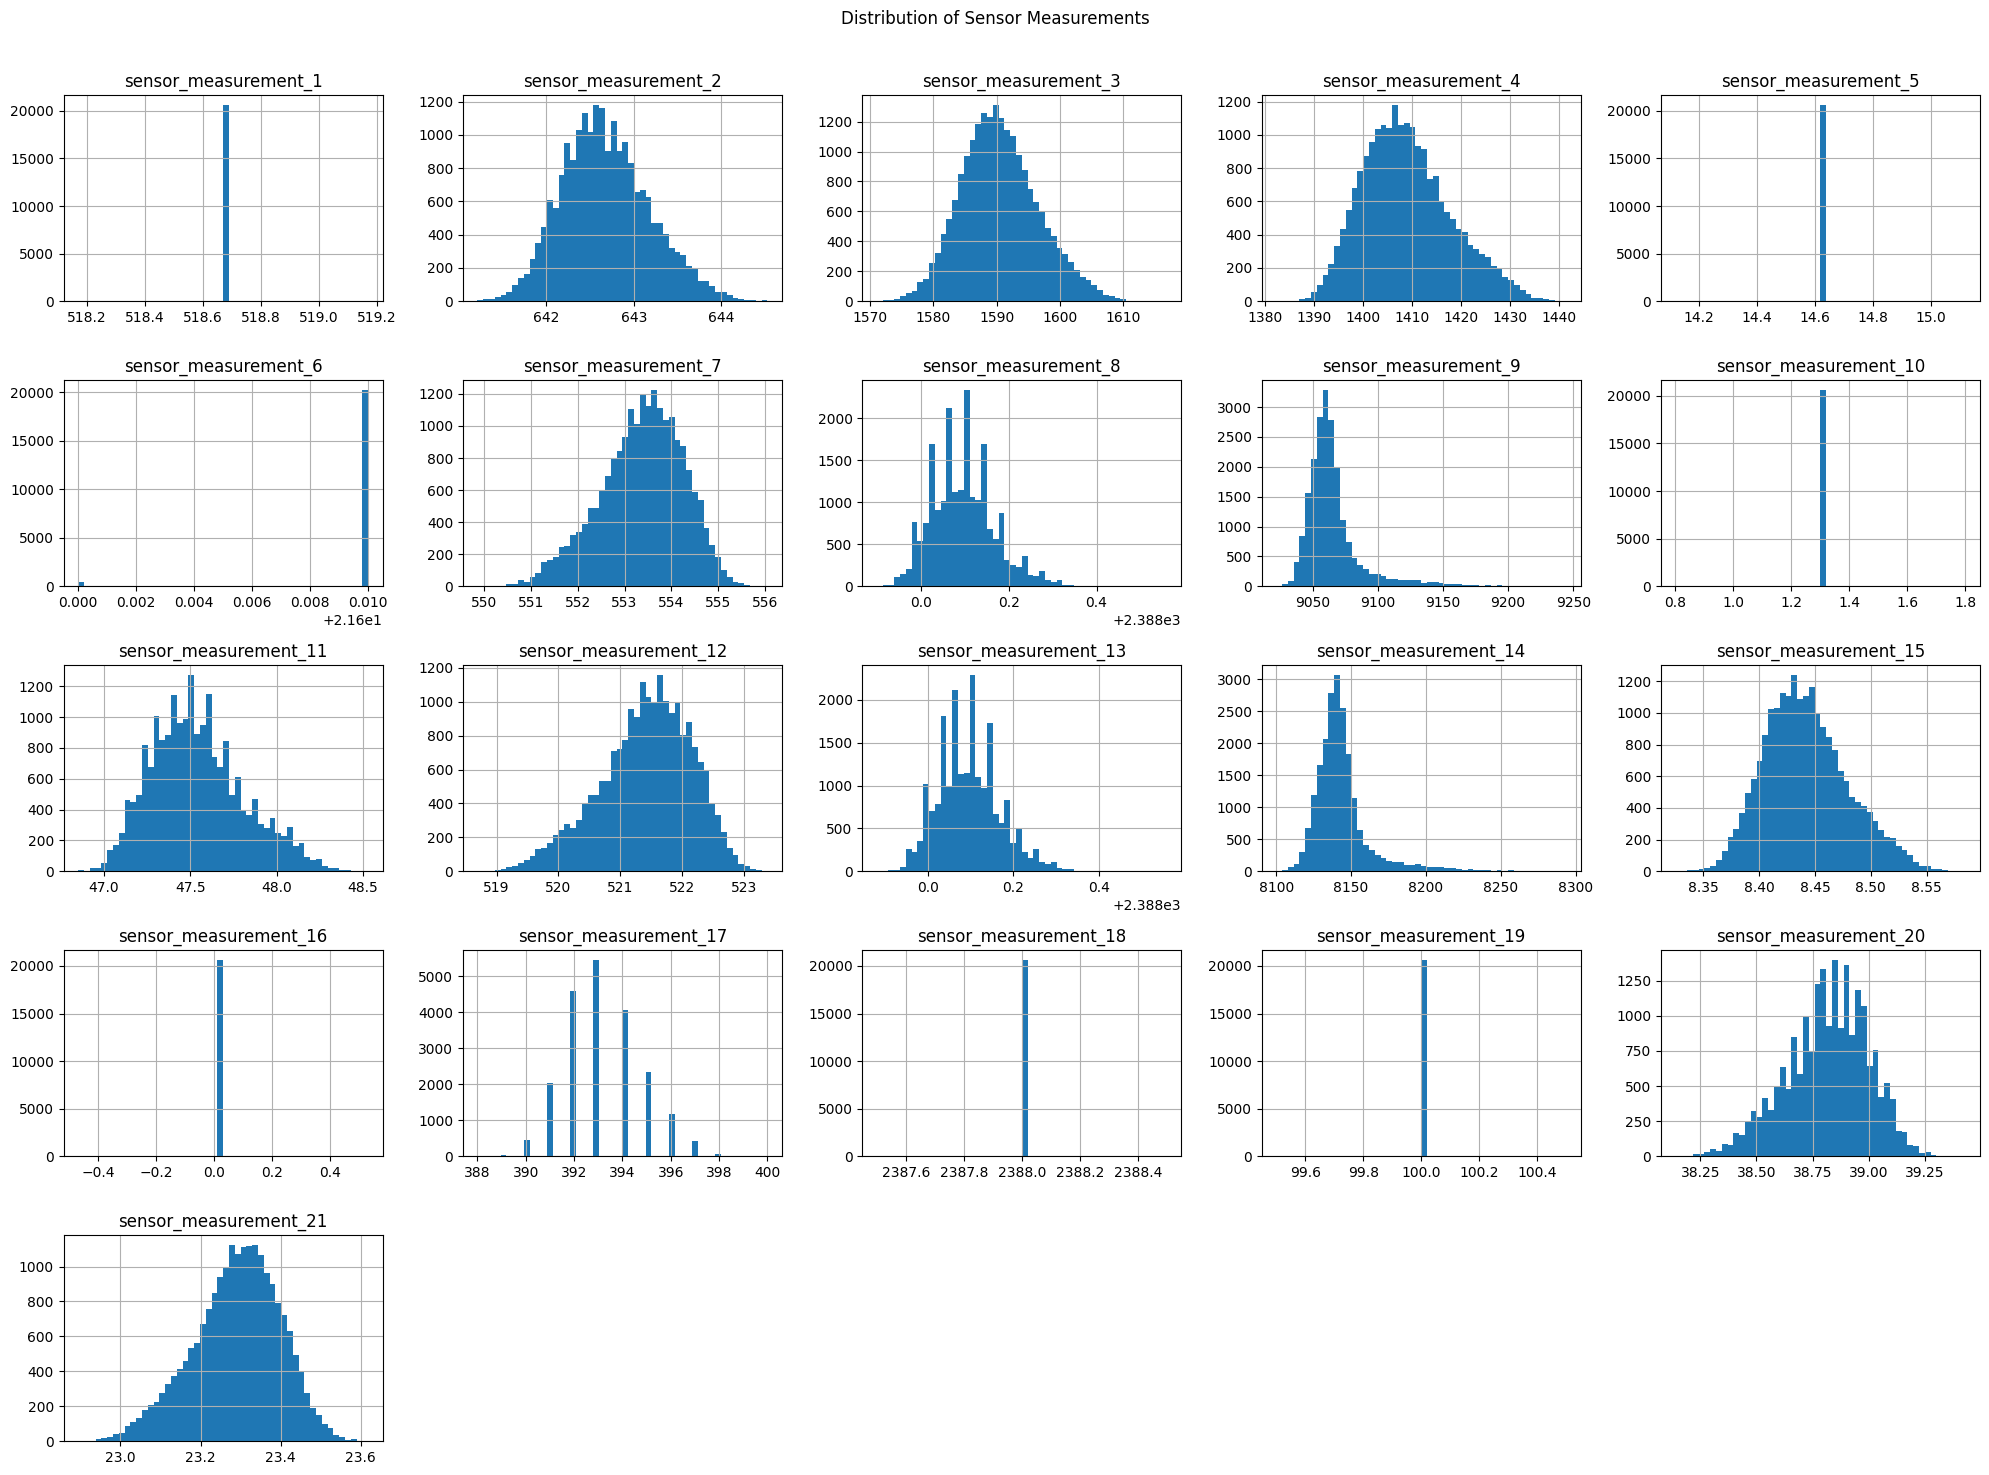

In [18]:
# Plot histograms for all sensor measurements
sensor_cols = [f'sensor_measurement_{i}' for i in range(1, 22)]
df[sensor_cols].hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribution of Sensor Measurements")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:

#Key Insights from the Histograms
#Looking at these plots, we can immediately group the sensors into two main categories:

#1. Constant or Near-Constant Sensors (Useless Features)
#You can see that some sensors, like sensor_measurement_1, 5, 6, 10, 16, 18, and 19, are just single vertical lines. This means their value never changes or has almost zero variance. Since these sensors don't change as the engine degrades, they provide no useful information for predicting failure. They are essentially noise.

#2. Useful, Variable Sensors
#The rest of the sensors (like 2, 3, 4, 7, 8, 11, etc.) show a nice distribution of values, whether it's a bell curve or skewed. This is exactly what we want to see. These sensors show variation, and it's the change in these patterns over time that will help our model predict an upcoming failure.

In [19]:
#Feature Selection (Removing Useless Features)
# List of columns to drop based on our histogram analysis
columns_to_drop = [
    'sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_6',
    'sensor_measurement_10', 'sensor_measurement_16', 'sensor_measurement_18',
    'sensor_measurement_19'
]

# Drop the columns from the dataframe
df.drop(columns=columns_to_drop, inplace=True)

print("Useless sensor columns have been removed.")
print("Remaining columns:", df.columns)

Useless sensor columns have been removed.
Remaining columns: Index(['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_17', 'sensor_measurement_20',
       'sensor_measurement_21', 'RUL'],
      dtype='object')


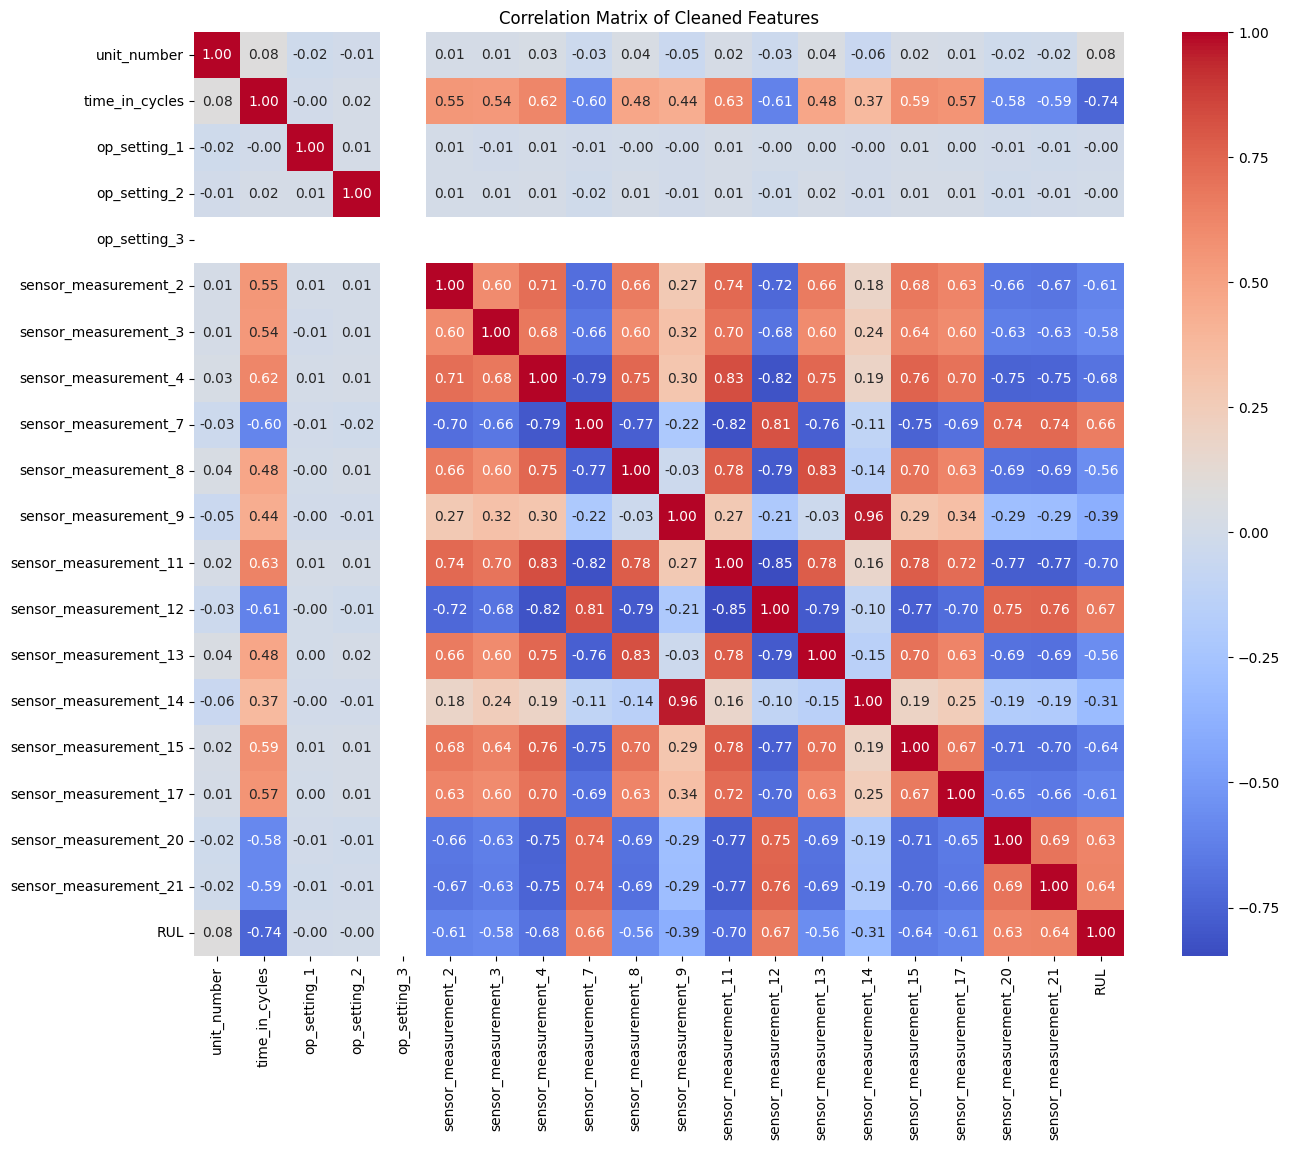

In [20]:
# --- Bivariate Analysis ---
# Calculate the correlation matrix on the cleaned dataframe
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Cleaned Features')
plt.show()

In [22]:
#Feature Engineering (Creating Better Features)
# Define a window size for the rolling average
window_size = 10

# List of promising sensors identified from the heatmap
promising_sensors = ['sensor_measurement_4', 'sensor_measurement_7', 'sensor_measurement_11', 'sensor_measurement_12']

# Create rolling average features
# The groupby('unit_number') is crucial to ensure we don't average across different engines
for sensor in promising_sensors:
    df[f'{sensor}_rolling_avg'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window_size, min_periods=1).mean())

print("New rolling average features created:")
df[['unit_number', 'time_in_cycles', 'sensor_measurement_4', 'sensor_measurement_4_rolling_avg']].head(15)

New rolling average features created:


,unit_number,time_in_cycles,sensor_measurement_4,sensor_measurement_4_rolling_avg
0,1,1,1400.60,1400.600000
1,1,2,1403.14,1401.870000
2,1,3,1404.20,1402.646667
3,1,4,1401.87,1402.452500
4,1,5,1406.22,1403.206000
5,1,6,1398.37,1402.400000
6,1,7,1397.77,1401.738571
7,1,8,1400.97,1401.642500
8,1,9,1394.80,1400.882222
9,1,10,1400.46,1400.840000
